<div><center><b>Energy Solutions Germany</div>
&nbsp;
<div><center><b>Deep learning workshop</div>
&nbsp;
<div><center>
<img src="img/1.png" width="500"/>
</div>
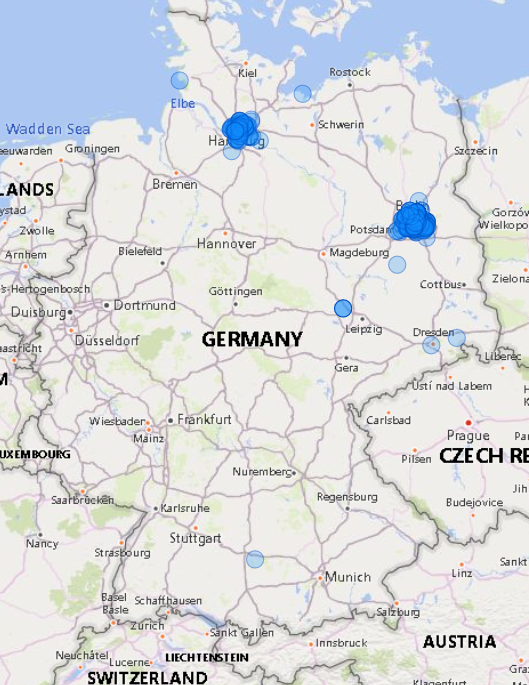

In [94]:
print("hello")

hello


Welcome to the interactive ML workshop!

<div><center>
<img src="img/2.png" width="1250"/>
</div>
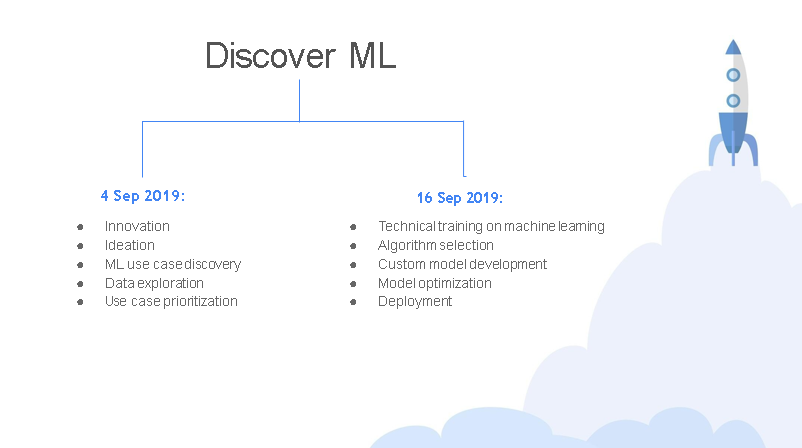

<div><center>
<img src="img/3.png" width="1250"/>
</div>
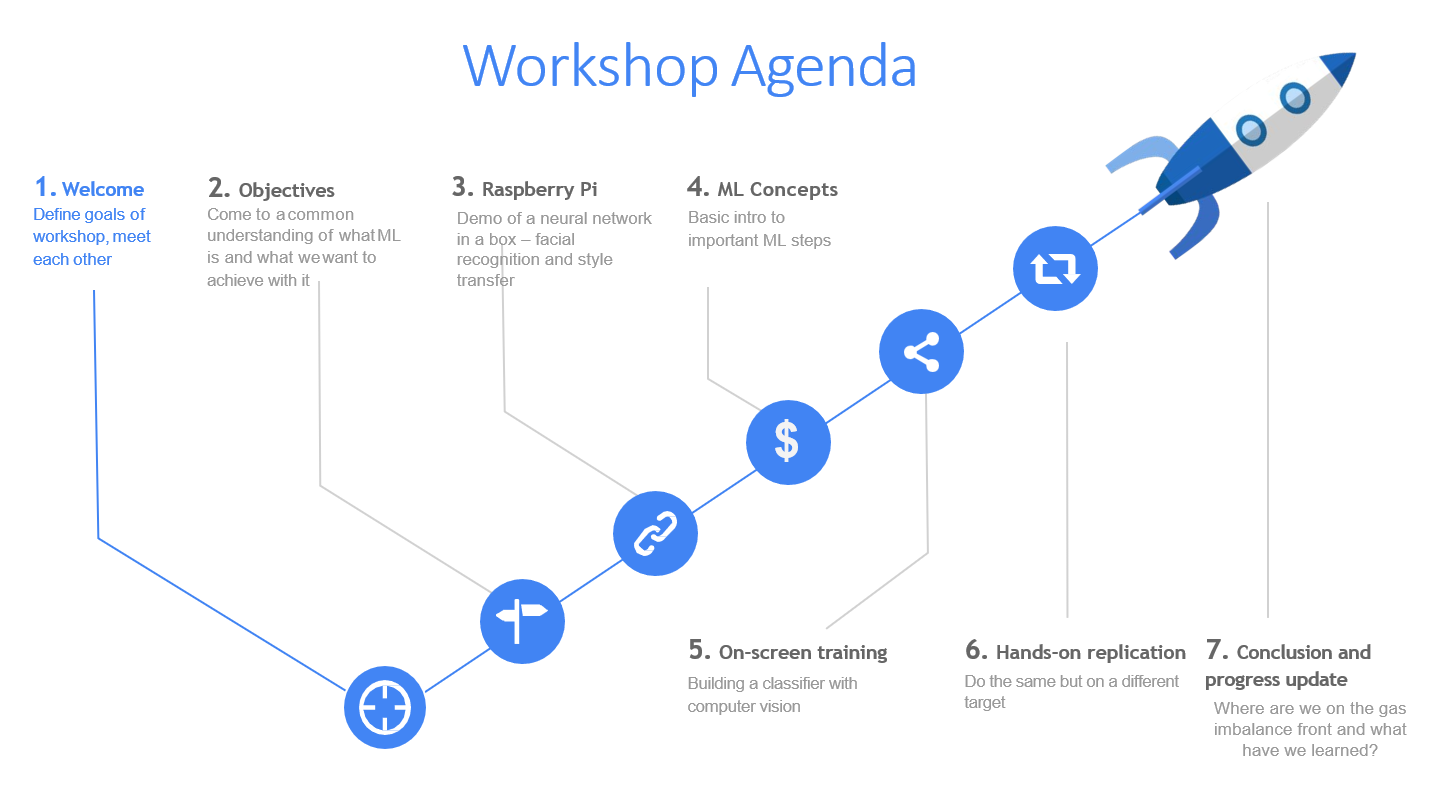

<div><center>
<img src="img/4.png" width="500"/>
</div>
&nbsp;
<div><center>We are using a jupyter notebook, which is a standard interactive, collaborative data science toolkit</center></div>
&nbsp;
<div><center>The name refers to Julia, Python, and R, which are popular data science languages</center></div>
&nbsp;
<div><center>In this workshop we will use the python language, which was developed by Dutchie Guido van Rossum.</center></div>
&nbsp;
<div><center>It is the most popular, and fastest growing data science language.</center></div>
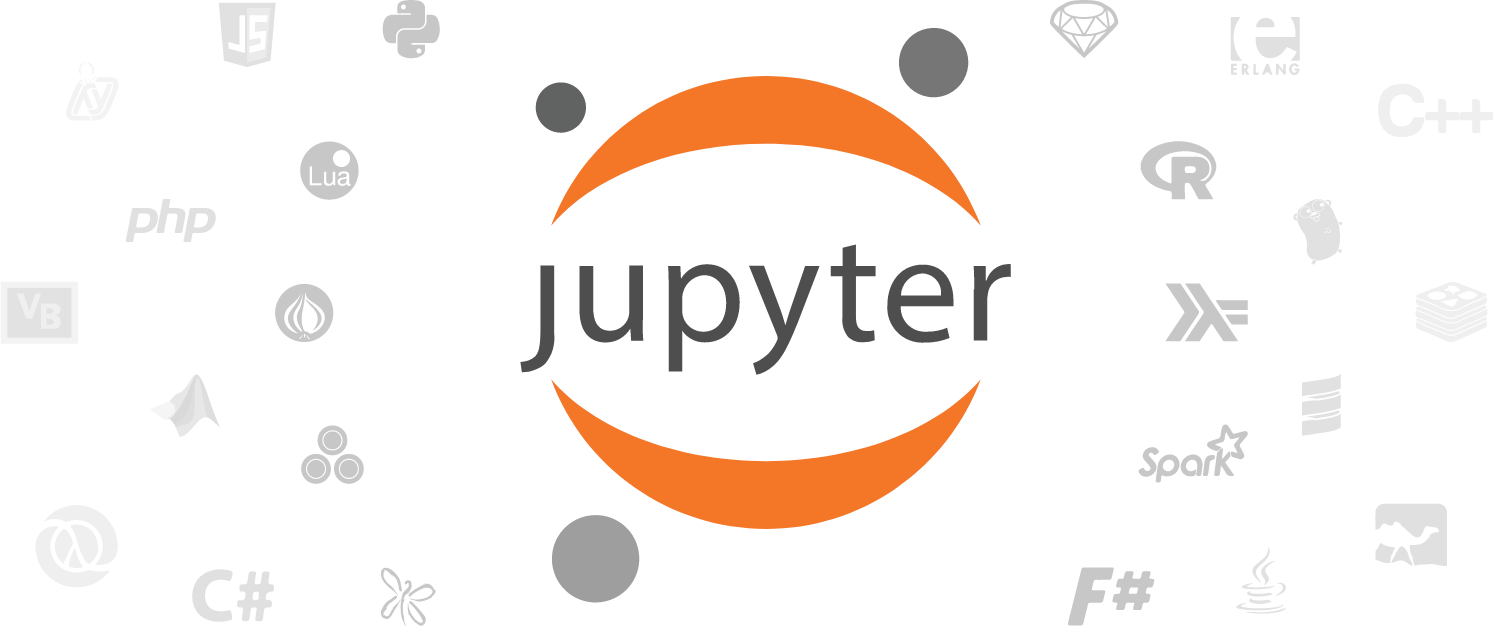

<div><center><b>So why do we need machine learning?
    </b></center></div>
&nbsp;
<div><center>
<img src="img/5.png" width="1250"/>
</div>
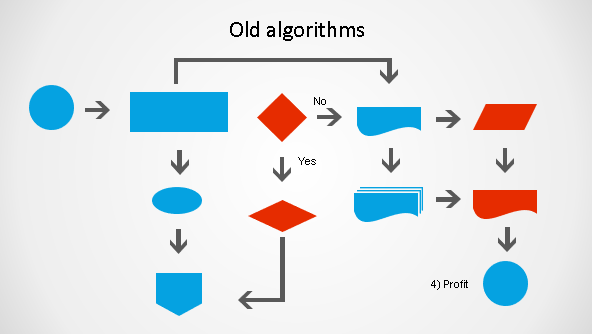

<div><center>
<img src="img/6.png" width="1250"/>
</div>
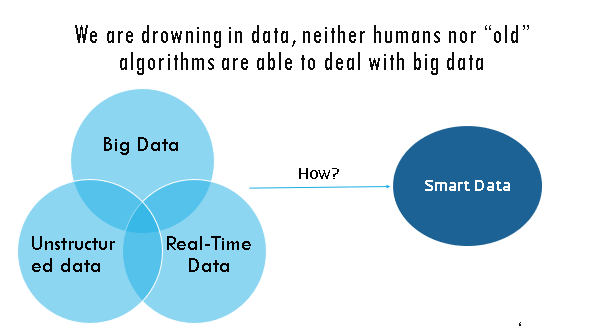

<div><center>
<img src="img/7.png" width="1250"/>
</div>
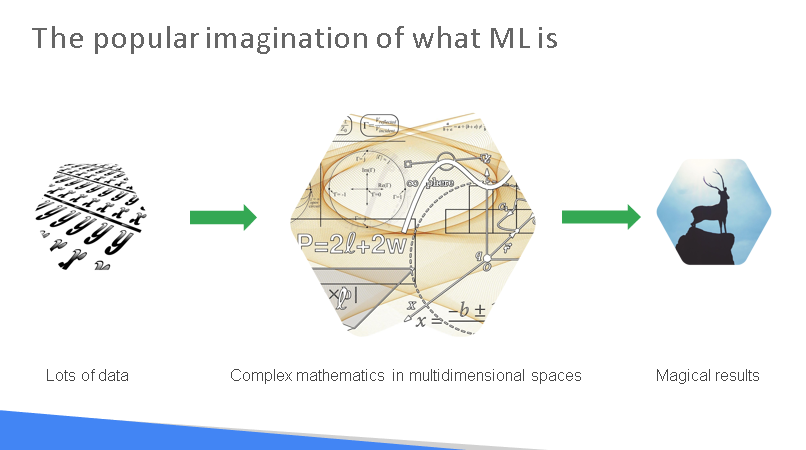

<div><center>
<img src="img/8.png" width="1250"/>
</div>
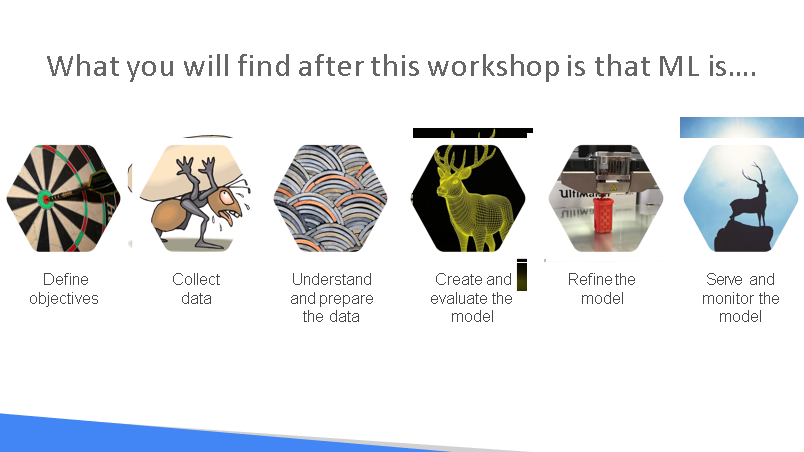

<div><center>
<img src="img/9.png" width="1250"/>
</div>
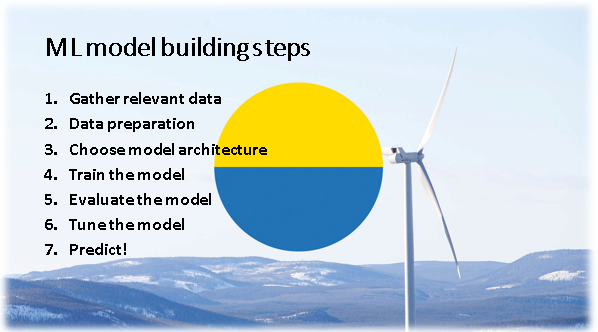

<div><center>
<img src="img/10.png" width="1250"/>
</div>
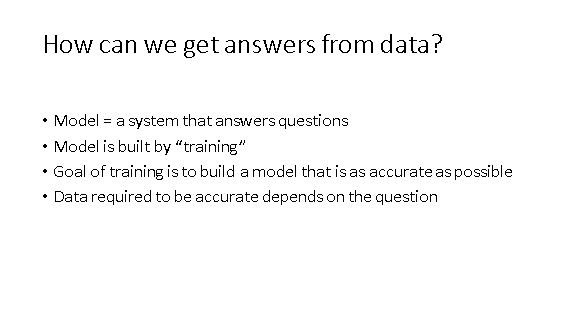

# Increasing depth in data

- Dummy = Yes or No, 0 or 1, True or False
- Scalar = A number, for example 255 kWh
- Vector = A time series of kWh
- Matrix = A vector of kWh by location
- Tensor = A matrix multiplied by at least on matrix (Multi-dimensional array), for example ESG's Loctions list as XY coordinates attachted to the time-series matrix

# Key takeaways

1. Up to date about imbalance progress
2. Understand AI key concepts - transfer learning, model architecture, data requirements
3. Able to do some AI yourself

In this workshop we will do "computer vision", one particular area of machine learning

This is good to work with interactively because you can see with your own eyes what is going on
in the neural network...

... all concepts apply to other areas of machine learning, and artificial intelligence more broadly

From vision, to speech, text, and numbers

In [1]:
#Let's start by setting up the environment that we will use during this workshop

import os, requests, json, os.path
from fastai.vision import *
from fastai import *
from fastai.callbacks.hooks import *
#from google_images_download import google_images_download
#response = google_images_download.googleimagesdownload()
from PIL import Image as pil_image
PIL.Image.LOADTRUNCATEDIMAGES = True

Ok, so what do we want to classify on?

In [95]:

os.chdir('C:/images/')
os.makedirs('classes', exist_ok=True)
path = 'C:/images/classes/'
class_list = [(f,f.replace('.csv','')) for f in os.listdir(path) if '.csv' in f]
for _,c in class_list:
    loc = os.path.join(path,c)
    if not os.path.isdir(loc):
        os.mkdir(loc)
print(class_list)

[('chp mtu.csv', 'chp mtu'), ('chp mwn.csv', 'chp mwn'), ('jenbacher_chp.csv', 'jenbacher_chp')]


In [96]:
for f,c in class_list:
    print(f,c)
    csv = os.path.join(path,f)
    print(csv)
    download_images(csv,os.path.join(path,c))
    verify_images(os.path.join(path,c), delete=True, max_size=500)

In [97]:
# do we have enough data?

DIR = 'C:/images/classes/'
d ={name:len(os.listdir(os.path.join(DIR,name))) for name in os.listdir(DIR) if not os.path.isfile(os.path.join(DIR, name))}
for k,v in d.items():
    print(k,':',v)
    print('')


chp mtu : 62

chp mwn : 88

jenbacher_chp : 91



In [98]:
# prepping the data...

np.random.seed(42)
data = ImageDataBunch.from_folder("C:/images/", train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

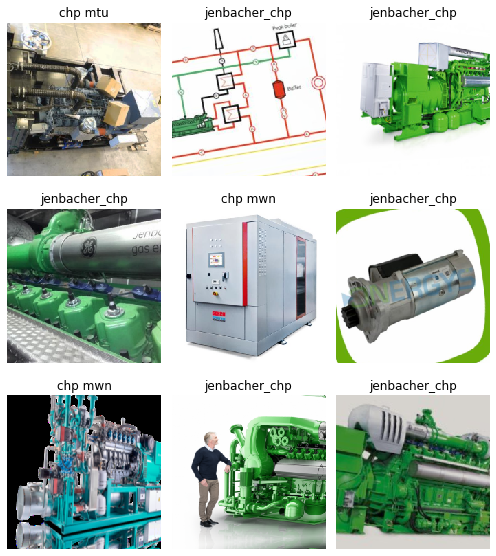

In [99]:
# is everything ok?

data.show_batch(rows=3, figsize=(7,8))

In [100]:
len(data.train_ds), len(data.valid_ds)

(190, 47)

In [107]:
# so here we choose the model architecture!

learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [ ]:

learn.load('pre_trained_chp')

In [109]:
learn.fit_one_cycle(2)

In [110]:
learn.validate()

[1.4984691, tensor(0.2979), tensor(0.7021)]

<div><center>
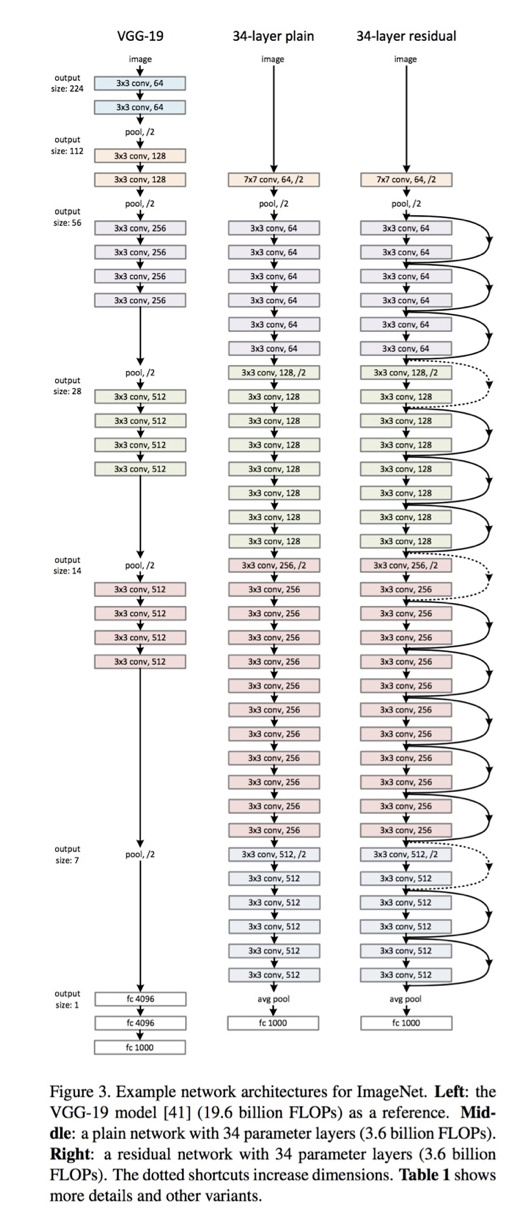
</center></div>

<div><center>While we're waiting - what's actually going on in this neural network?</center></div>
<div>&nbsp;</div>
<div><center>
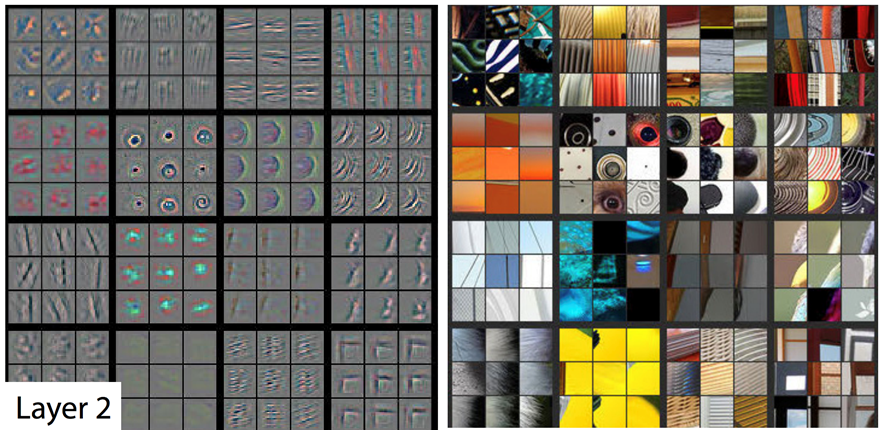
</div>

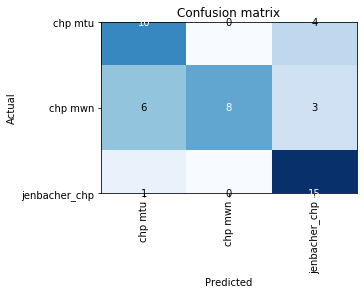

In [111]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

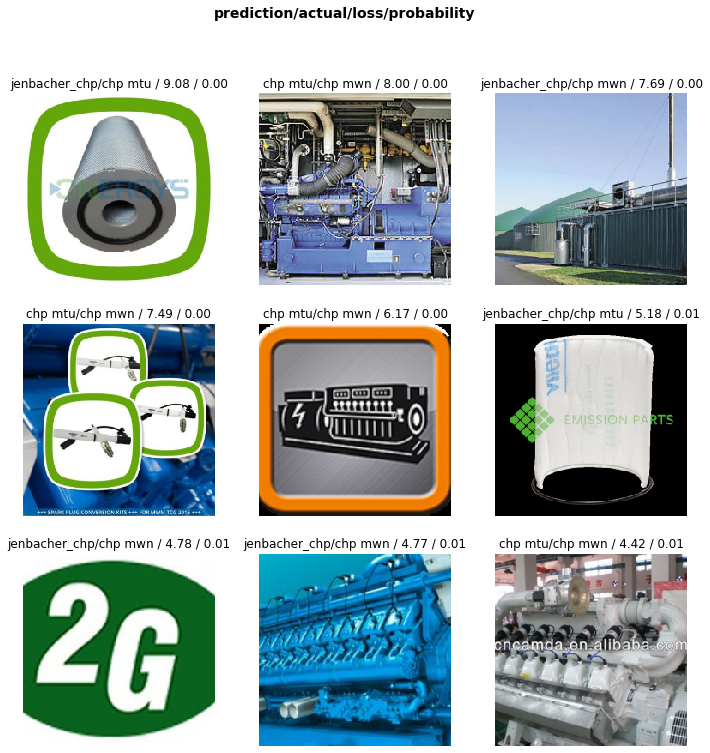

In [112]:
interp.plot_top_losses(9)

In [105]:
# so what would happen with random weights, instead of starting with a pre-trained network (transfer learning)?

learn.save('pre_trained_chp')
del learn

In [81]:
learn_wo = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy], pretrained=False)

c:\program files\python37\lib\site-packages\fastai\vision\learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [82]:
learn_wo.fit_one_cycle(4)

<div><center><b>What is fitting and why does it matter?</b></center></div>
<div>&nbsp;</div>
<div><center>
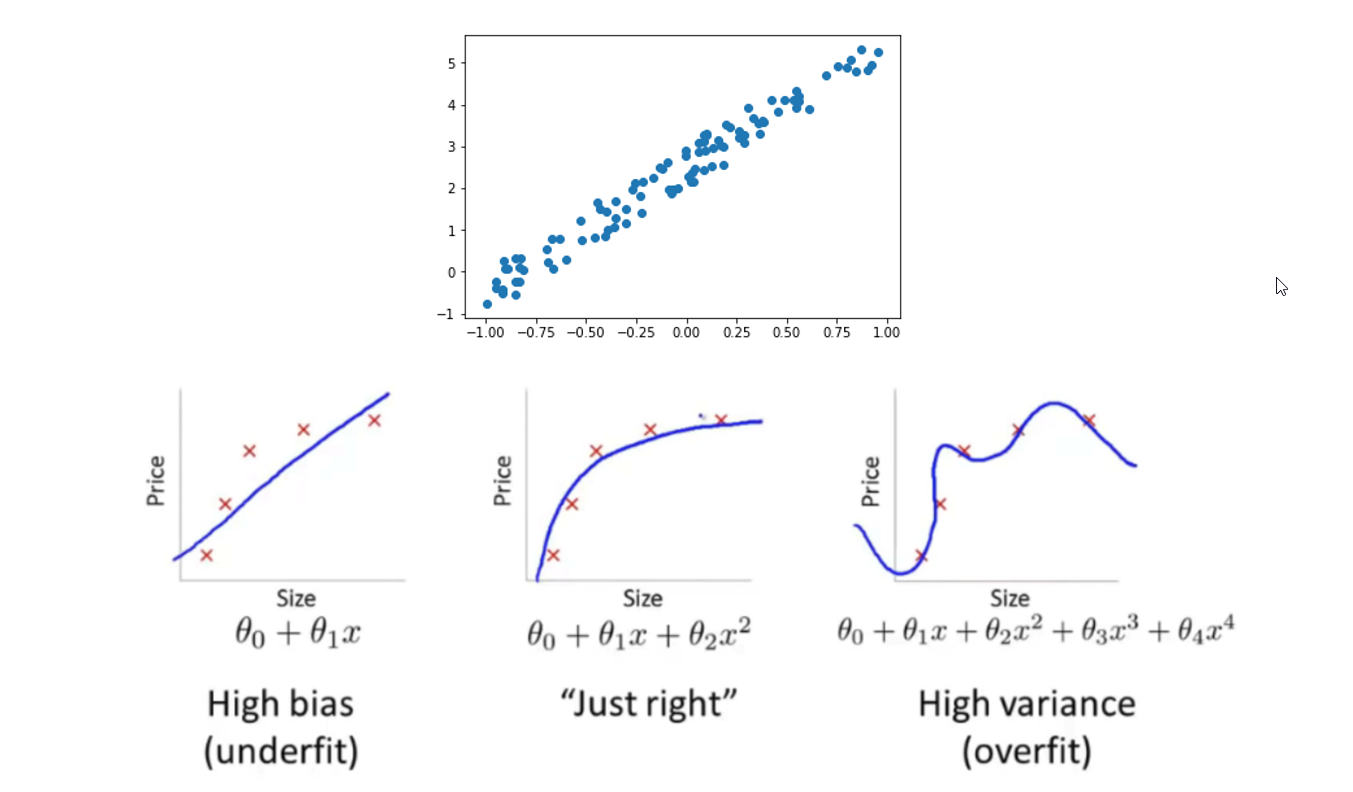
</center></div>

In [83]:
interp_wo = ClassificationInterpretation.from_learner(learn_wo)

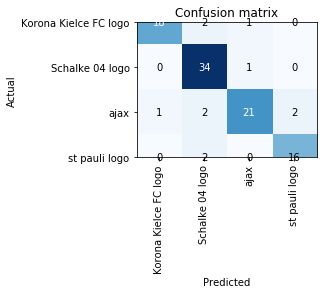

<Figure size 432x288 with 0 Axes>

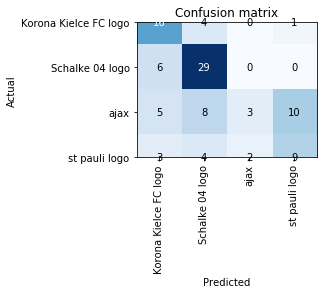

In [84]:
# not so good in comparison

interp.plot_confusion_matrix()
plt.figure()
interp_wo.plot_confusion_matrix()

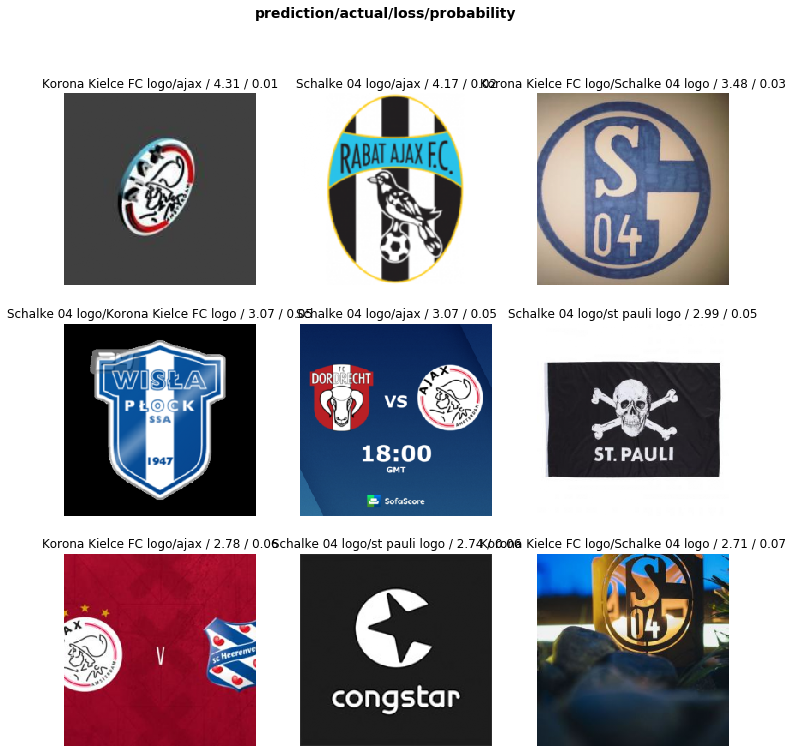

In [85]:
interp_wo.plot_top_losses(9)

In [86]:
learn_wo.save('trained')

In [ ]:
learn.load('pre_trained')

In [87]:
m = learn_wo.model.eval();

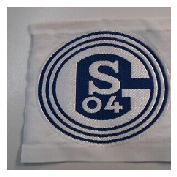

In [88]:
idx=18
x,y = data.valid_ds[idx]
x.show()
x,_ = data.one_item(x)

In [89]:
x_im = Image(data.denorm(x)[0])
#Image(data.denorm(x)[0])

In [90]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(x)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

hook_a,hook_g = hooked_backward()

In [91]:
acts  = hook_a.stored[0].cpu()
acts.shape
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([7, 7])

In [92]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    x_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

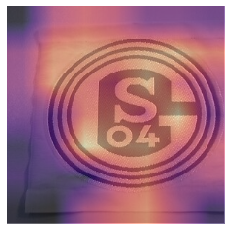

In [93]:
show_heatmap(avg_acts)

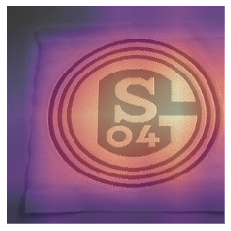

<div><center>
<img src="img/12.png" width="1250"/>
</div>
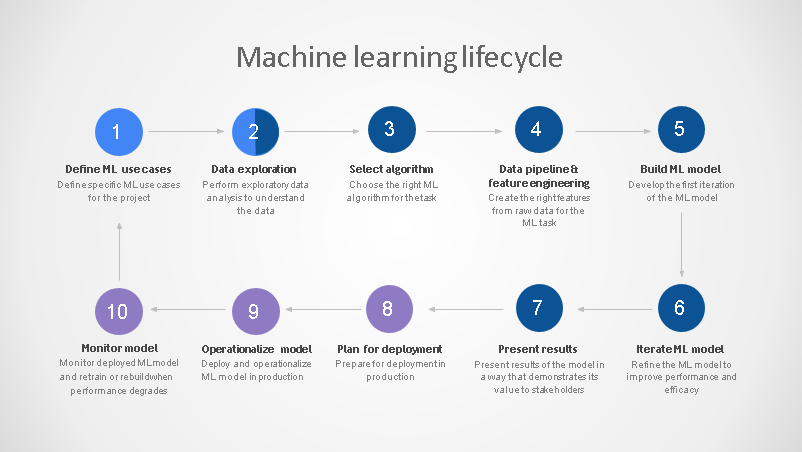

<div><center>
<img src="img/13.png" width="1250"/>
</div>
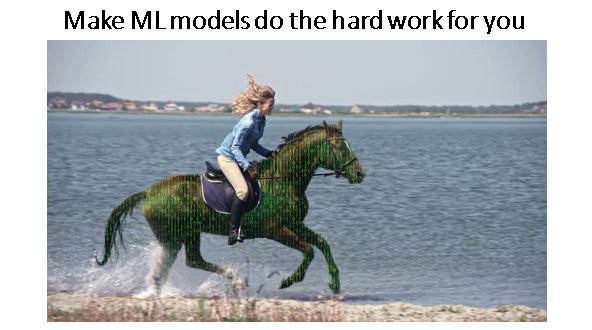

<div><center>
<img src="img/14.png" width="1250"/>
</div>
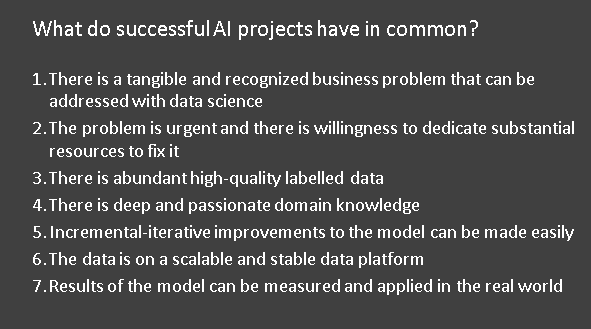

# Takeaway concepts

- Model architecture
- Transfer learning
- Freezing


- Parameters/weights/coefficients
- Over/underfitting Fitting
- Stochastic Gradient descent


- Loss function
- Training batches
- Learning rate

<div><center>Now you! We will supervise</center></div>

<div><center>
<img src="img/15.png" width="1250"/>
</div>
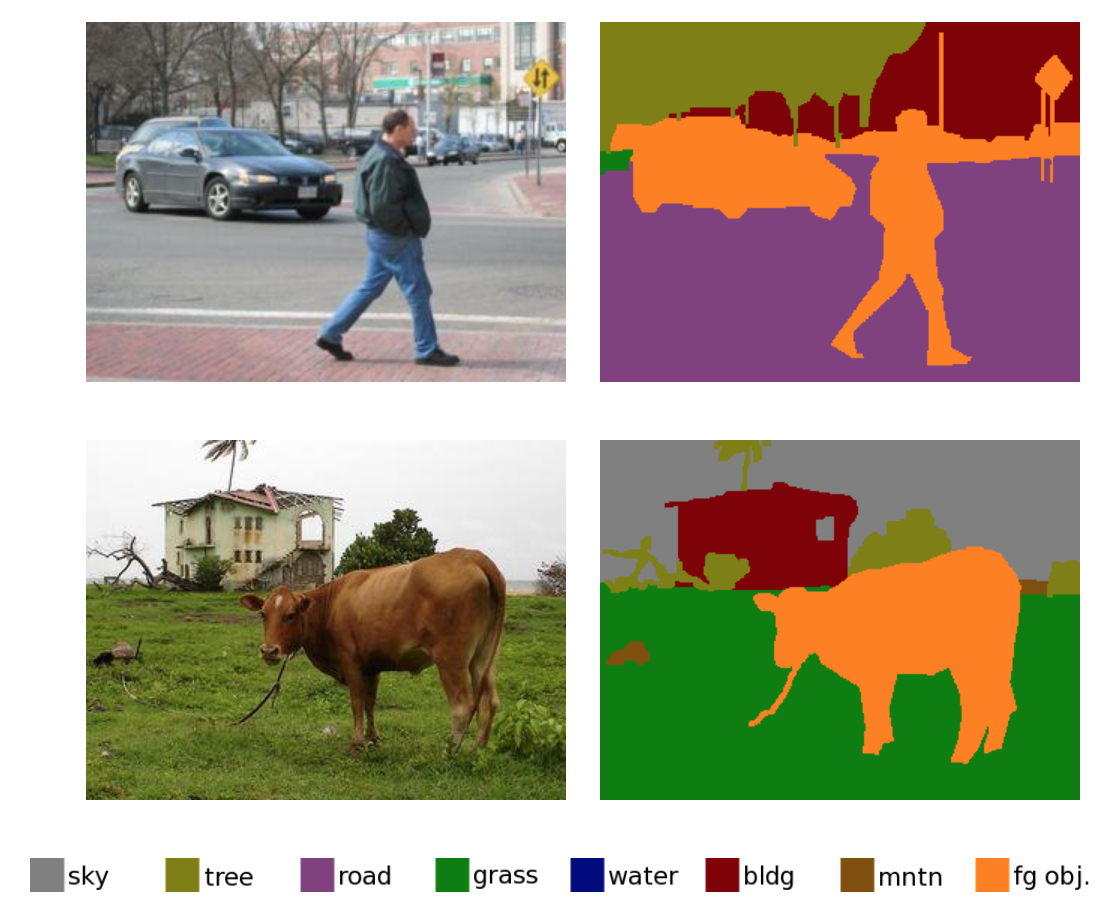

<div><center>
<img src="img/9.png" width="1250"/>
</div>
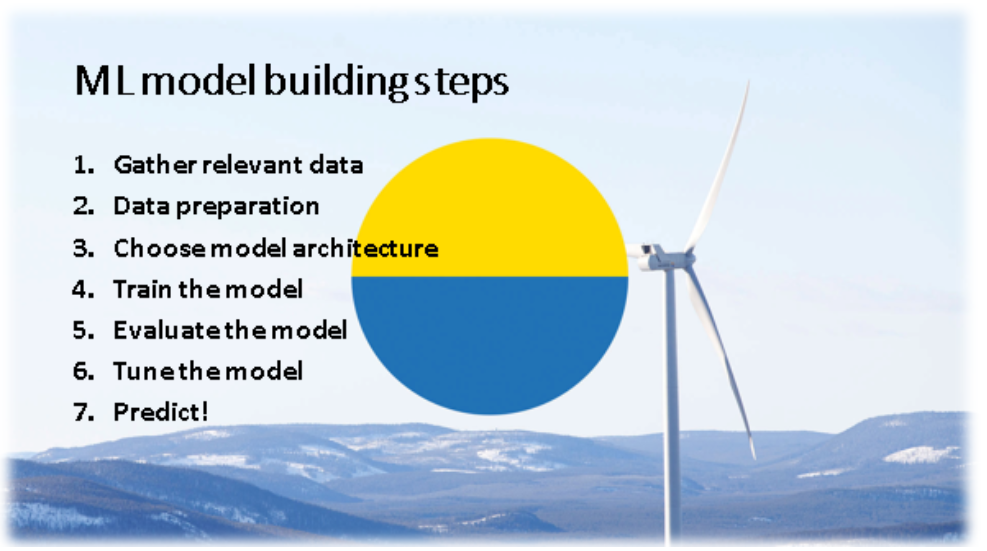

<div><center>
<img src="img/16.png" width="1250"/>
</div>
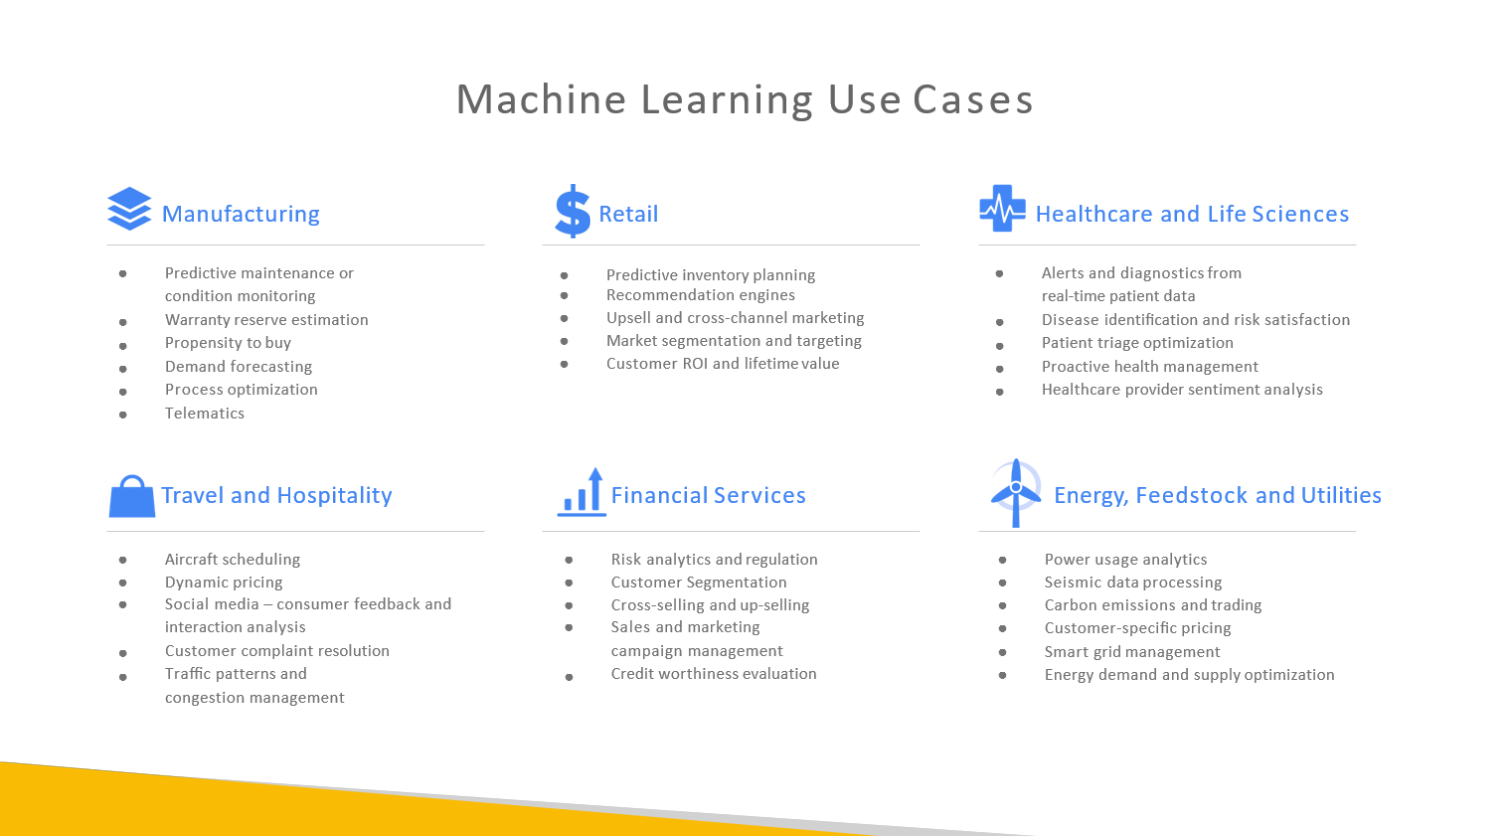

<div><center>
<img src="img/18.png" width="1250"/>
</div>


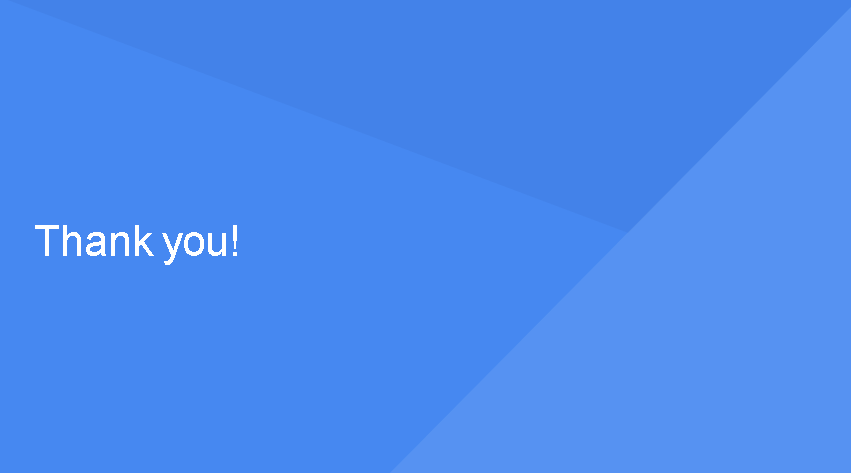